In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import random as r

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
# Number of Images, Width, Height, Channels
print(X_train.shape)

(50000, 32, 32, 3)


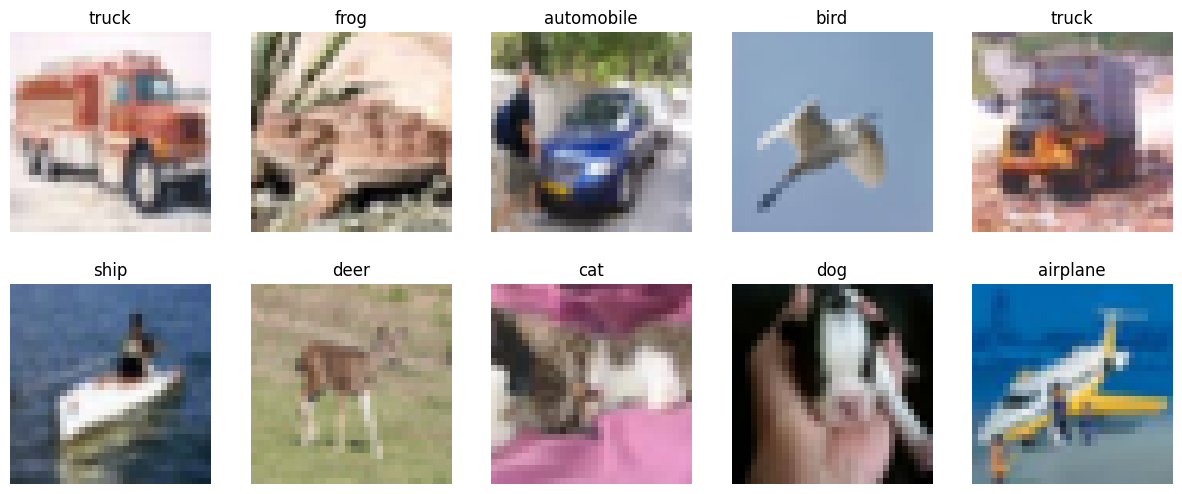

In [ ]:
plt.figure(figsize=(15, 6))

# plot 10 random images
for i in range(10):
  random_idx = r.randint(0, X_train.shape[0] - 1)
  plt.subplot(2, 5, i + 1)
  plt.imshow(X_train[random_idx])
  plt.title(class_names[Y_train[random_idx][0]])
  plt.axis("off")

plt.show()

In [ ]:
# 1 = [1, 0, 0, 0, 0]
# 2 = [0, 1, 0, 0, 0]

Y_train_en = keras.utils.to_categorical(Y_train, 10)
Y_test_en = keras.utils.to_categorical(Y_test, 10)

In [ ]:
# normalize images for easier training
X_train_norm = X_train/255
X_test_norm = X_test/255

In [ ]:
# define model architecture
model = keras.models.Sequential()

                        # # of kernels, (kernel width, kernel height)
model.add(keras.layers.Conv2D(32, (4, 4), input_shape=(32, 32, 3)))
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Conv2D(64, (4, 4)))
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Conv2D(64, (4, 4)))
model.add(keras.layers.ReLU())
model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.categorical_crossentropy, # [0.6, 0.1, 0.05, ......]
              metrics=["accuracy"])

In [ ]:
model.fit(X_train_norm, Y_train_en, epochs=2)

Epoch 1/2
1563/1563 [==============================] - 101s 63ms/step - loss: 1.6022 - accuracy: 0.4084
Epoch 2/2
1563/1563 [==============================] - 97s 62ms/step - loss: 1.2586 - accuracy: 0.5503


In [ ]:
model = tf.keras.models.load_model('CIFAR_model_5epochs.h5')

In [ ]:
model.evaluate(X_test_norm, Y_test_en)

313/313 [==============================] - 10s 32ms/step - loss: 0.9956 - accuracy: 0.6520


[0.9955778121948242, 0.6520000100135803]

1/1 [==============================] - 0s 43ms/step


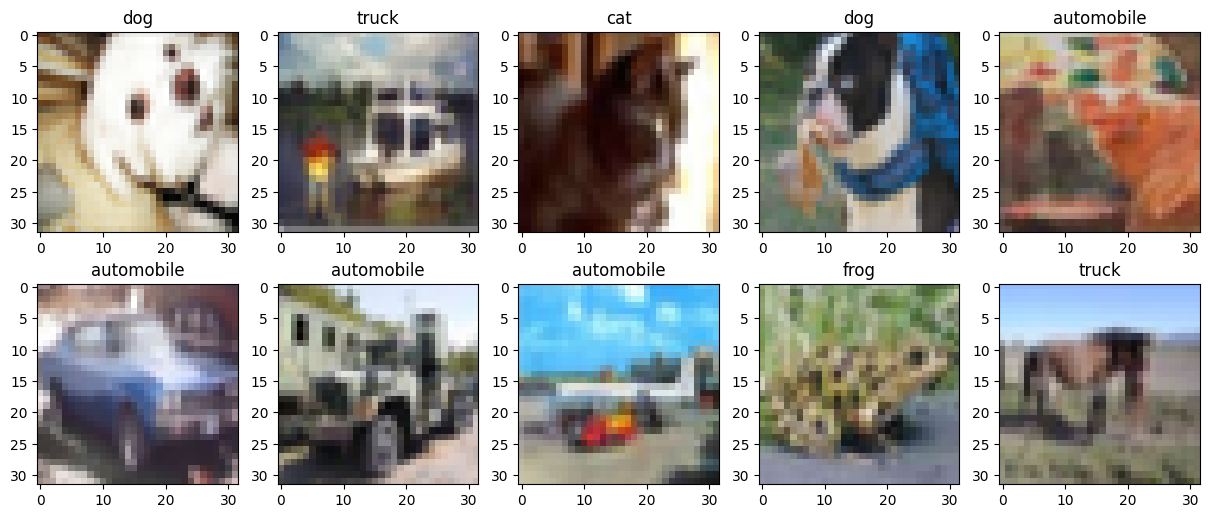

In [ ]:
plt.figure(figsize=(15, 6))

for i in range(10):

  # get random img
  random_idx = r.randint(0, X_test.shape[0] - 1)
  plt.subplot(2, 5, i + 1)
  plt.imshow(X_test[random_idx])
  # predict on image
  pred = model.predict(X_test[None, random_idx, ...])
  # get most likely class
  plt.title(class_names[np.argmax(pred)])